# read me
- 작성자 :신재호
- smote 기법을 적용한 전처리
- 1차 수정 (by 반기림 on 18th Nov)
- add features of setting sampling_strategy
- add random state to generate the same sampling set every time code running

In [1]:
import os
import math
import numpy as np
import pandas as pd

from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt
import warnings, random
warnings.filterwarnings(action='ignore')

import matplotlib.pyplot as plt


# !pip install catboost
from catboost import CatBoostClassifier, Pool

In [18]:
# from google.colab import drive
# drive.mount('/content/drive')

# main_dir = '/content/drive/MyDrive/SKKU_study/01_Final_assignment'
# data_dir = os.path.join(main_dir, 'data')
# processed_data_dir = os.path.join(data_dir, 'processed')
# raw_data_dir = os.path.join(data_dir, 'raw')

# os.makedirs(data_dir, exist_ok=True)
# os.makedirs(processed_data_dir, exist_ok=True)

# train = pd.read_csv(os.path.join(processed_data_dir, 'train.csv'))
# test = pd.read_csv(os.path.join(processed_data_dir, 'test.csv'))
# raw = pd.read_csv(os.path.join(raw_data_dir, 'credit_score_data.csv'))

train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')
raw = pd.read_csv('./processed.csv')

target = 'Credit_Score'
train.shape, test.shape

x_train = train.drop(target,axis=1)
y_train = train[target]
x_test = test.drop(target,axis=1)
y_test = test[target]

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((75000, 22), (75000,), (25000, 22), (25000,))

# baseline

In [14]:
from imblearn.over_sampling import SMOTE 

def sampling_smote_baseline(x_input_df, y_input_df, sampling_strategy='auto'):
  """
  smote기법을 처리 없이 시도하는 함수

  params:
    x_input_df: 샘플링 원하는 x데이터프레임
    y_input_df: 샘플링 원하는 y데이터프레임
    sampling_strategy: oversampling class 비율 설정
      default='auto' 자동으로 minority의 수를 majority의 수와 맞춤
      otherwise, 딕셔너리 형태로 주어야함 (e.g. {0: 1.2, 1: 0.5, 2: 1.9})

  return :
    샘플링 완료된 x, y 데이터프레임

  사용예시 :
    output_x, output_y = sampling_smote_vanilla(x_train,y_train)


  참고:
  https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html
  """


  #sampling fit
  smote_clf = SMOTE(sampling_strategy=sampling_strategy, random_state=42)
  x_sampling_df, y_sampling_df = smote_clf.fit_resample(x_input_df, y_input_df)
  '''
  sampling_strategy : default='auto'

  'minority': 소수 클래스만 리샘플링합니다.
  'not minority': 소수 클래스를 제외한 모든 클래스를 다시 샘플링합니다.
  'not majority': 대부분의 클래스를 제외한 모든 클래스를 리샘플링합니다.
  'all': 모든 클래스를 다시 샘플링합니다.
  'auto': 에 해당합니다 .'not majority'


  k_neighbors int 또는 객체, 기본값=5
  샘플을 구성하는 데 사용할 가장 가까운 이웃의 수
  '''

  # result print
  print('=========== shape ===========')
  print('before shape : ', x_input_df.shape, y_input_df.shape)
  print('after shape : ', x_sampling_df.shape, y_sampling_df.shape)

  print('\n\n=========== value_counts ===========')
  print('before shape : ', dict(y_input_df.value_counts()))
  print('after shape : ', dict(y_sampling_df.value_counts()))

  #result return
  return x_sampling_df, y_sampling_df

In [15]:
output_x,output_y = sampling_smote_baseline(x_train,y_train)

=========== shape ===========
before shape :  (75000, 22) (75000,)
after shape :  (120642, 22) (120642,)


=========== value_counts ===========
before shape :  {1: 40214, 0: 21782, 2: 13004}
after shape :  {2: 40214, 1: 40214, 0: 40214}


In [17]:
# strategy 활용 예시
# 일부만 오버샘플링
strategy = {0: 30000, 1: 40214, 2: 25000}
output_x,output_y = sampling_smote_baseline(x_train,y_train, strategy)

=========== shape ===========
before shape :  (75000, 22) (75000,)
after shape :  (95214, 22) (95214,)


=========== value_counts ===========
before shape :  {1: 40214, 0: 21782, 2: 13004}
after shape :  {1: 40214, 0: 30000, 2: 25000}


In [16]:
from imblearn.over_sampling import SMOTENC

def sampling_smote_enc(x_input_df, y_input_df, categorical_cols, sampling_strategy='auto'):
  """
  smote기법을 처리 없이 시도하는 함수

  params:
    x_input_df: 샘플링 원하는 x데이터프레임
    y_input_df: 샘플링 원하는 y데이터프레임

  return :
    샘플링 완료된 x, y 데이터프레임

  사용예시 :
    output_x, output_y = sampling_smote(x_train,y_train)

  참고:
  https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTENC.html
  """

  #sampling fit
  smote_clf = SMOTENC(random_state=42, categorical_features=categorical_cols, sampling_strategy=sampling_strategy)
  x_sampling_df, y_sampling_df = smote_clf.fit_resample(x_input_df, y_input_df)

  # result print
  print('=========== shape ===========')
  print('before shape : ',x_input_df.shape, y_input_df.shape)
  print('after shape : ',x_sampling_df.shape, y_sampling_df.shape)

  print('\n\n=========== value_counts ===========')
  print('before shape : ' ,dict(y_input_df.value_counts()))
  print('after shape : ',dict(y_sampling_df.value_counts()))

  #result return
  return x_sampling_df, y_sampling_df

In [21]:
cat_col = ['Customer_ID', 'Month', 'Credit_Mix', 'Credit_History_Age',
           'Payment_of_Min_Amount', 'Payment_Behaviour']

In [22]:
cat_col_idx = [list(raw.columns).index(col) for col in cat_col]
cat_col_idx

[0, 1, 12, 15, 16, 19]

In [23]:
sampling_smote_enc(x_train, y_train, cat_col_idx)

=========== shape ===========
before shape :  (75000, 22) (75000,)
after shape :  (120642, 22) (120642,)


=========== value_counts ===========
before shape :  {1: 40214, 0: 21782, 2: 13004}
after shape :  {2: 40214, 1: 40214, 0: 40214}


(        Customer_ID  Month  Age  Occupation  Monthly_Inhand_Salary  \
 0               576      1    3          12               7.509249   
 1               576      2    3          12               7.509249   
 2               576      3    3          12               7.509249   
 3               576      4    3          12               7.509249   
 4               576      5    3          12               7.509249   
 ...             ...    ...  ...         ...                    ...   
 120637         3933      4    5          13               6.823428   
 120638          826      6    3          11               8.867451   
 120639         4674      2    4          10               8.273598   
 120640          868      3    3          10               8.386706   
 120641        10638      2    5          12               8.394795   
 
         Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  Num_of_Loan  \
 0                3.000000         4.000000       3.000000            0

In [24]:
# strategy 활용 예시
# 일부만 오버샘플링
strategy = {0: 30000, 1: 40214, 2: 25000}
output_x,output_y = sampling_smote_enc(x_train, y_train, cat_col_idx, sampling_strategy=strategy)

=========== shape ===========
before shape :  (75000, 22) (75000,)
after shape :  (95214, 22) (95214,)


=========== value_counts ===========
before shape :  {1: 40214, 0: 21782, 2: 13004}
after shape :  {1: 40214, 0: 30000, 2: 25000}


# 타 모듈 임포트

In [ ]:
# # ipynb 모듈 import를 위한 패키지
# # !pip install import_ipynb
# # %cd ./drive/MyDrive/SKKU_study/01_Final_assignment/source/
# import import_ipynb
# import preprocessing as pp 
# import model_catboost as mc 

In [ ]:
# mc.catboost_baseline(x_train,y_train,x_test,y_test)

CatBoostError: ignored

In [ ]:
def make_3d_plot(input_df,hist_columns,reduce_rate=1):
  '''
  3D로 표현하기 위한 함수

  input_df:3차원 데이터프레임 입력
  hist_columns : 색 차이를 주려는 feature 이름
  reduce_rate : point 점 수를 1/reduce_rate만큼 줄여줌
  '''
  fig = plt.figure(figsize=(25,17))
  ax = fig.add_subplot(111,projection='3d')

  col = list(input_df.columns)
  col.remove(hist_columns)

  for i in range(3):
    temp = input_df.loc[input_df[hist_columns]==i]
    ax.scatter(temp[col[0]][::reduce_rate],temp[col[1]][::reduce_rate],temp[col[2]][::reduce_rate], cmap="Greys")

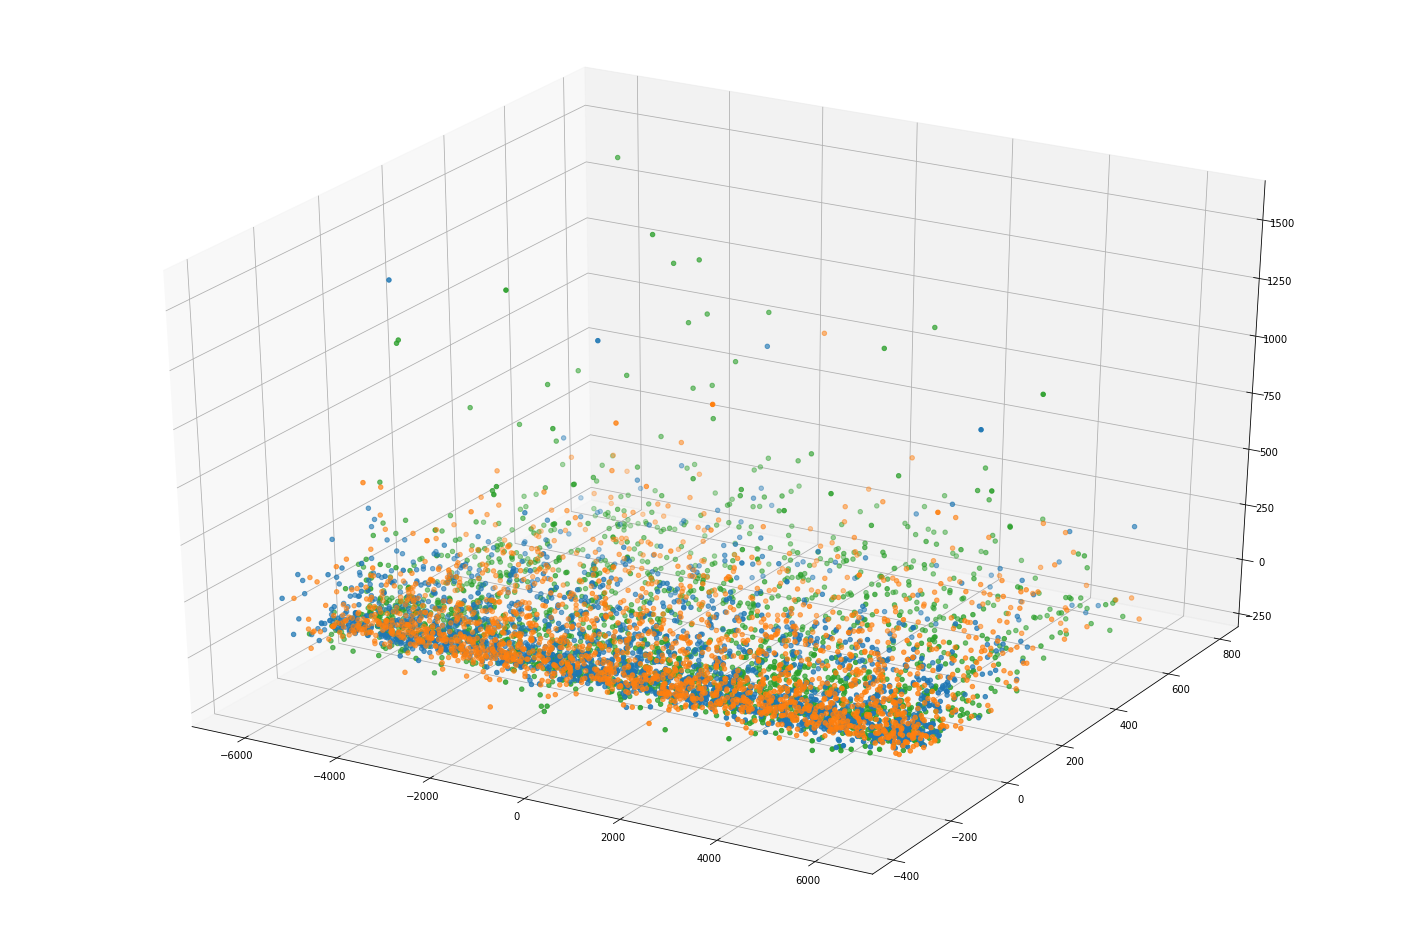

In [ ]:
# make_3d_plot(pca_df,'target',20)
